# Healthcare in Different States

In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures. The data originally came from the United State Health and Human Services Department.

## Data Investigation

Let's import nrcessary libraries and the dataset into a variable named `healthcare`. 

In [69]:
import pandas as pd
from matplotlib import pyplot as plt

healthcare = pd.read_csv("healthcare.csv")

Now we going to take a look at what data we have to work with. 

In [70]:
healthcare.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


Let's check how many unique diagnoses there are in the dataset. 

In [71]:
len(healthcare["DRG Definition"].unique())

100

There are many different kinds of them, so to be focused, let's get one of them, for instance "069 - TRANSIENT ISCHEMIA".

In [72]:
healthcare["DRG Definition"].unique()[:10]

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC'], dtype=object)

Now we need to grab only those rows from the dataset that mention "069 - TRANSIENT ISCHEMIA". 

In [73]:
ischemia = healthcare[healthcare['DRG Definition'] == '069 - TRANSIENT ISCHEMIA']
len(ischemia)

1962

There are also many of them (1962), so let's check only 5 of them.

In [74]:
ischemia.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
1763,069 - TRANSIENT ISCHEMIA,10047,GEORGIANA HOSPITAL,515 MIRANDA ST,GEORGIANA,AL,36033,AL - Montgomery,32,5062.59,4277.31,3386.18
2157,069 - TRANSIENT ISCHEMIA,10049,MEDICAL CENTER ENTERPRISE,400 N EDWARDS STREET,ENTERPRISE,AL,36330,AL - Dothan,17,22034.35,3758.00,2674.82
2297,069 - TRANSIENT ISCHEMIA,10054,PARKWAY MEDICAL CENTER,1874 BELTLINE RD SW,DECATUR,AL,35601,AL - Huntsville,20,23957.70,5708.65,2796.80
2624,069 - TRANSIENT ISCHEMIA,10055,FLOWERS HOSPITAL,4370 WEST MAIN STREET,DOTHAN,AL,36305,AL - Dothan,17,26806.52,4006.23,2688.11
2760,069 - TRANSIENT ISCHEMIA,10056,ST VINCENT'S BIRMINGHAM,810 ST VINCENT'S DRIVE,BIRMINGHAM,AL,35205,AL - Birmingham,49,12191.95,3857.10,2691.10


## Separating By State

Now we want to separate the dataset by state. Eventually, we’ll use a for loop to do this for every state, but for now, let’s prove to ourselves that we can make a boxplot for at least one state, Alabama for instance. When we printed the head, we saw the first few rows had a 'Provider State' of "AL". Those were exactly the hospitals of Alabama.

So let's get every transient ischemia diagnosis in Alabama.

In [75]:
alabama_ischemia = ischemia[ischemia['Provider State'] == "AL"]
len(alabama_ischemia)

48

There are 48 diagnosed cases of ischemia in Alabama, let's check 5:

In [76]:
alabama_ischemia.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
1763,069 - TRANSIENT ISCHEMIA,10047,GEORGIANA HOSPITAL,515 MIRANDA ST,GEORGIANA,AL,36033,AL - Montgomery,32,5062.59,4277.31,3386.18
2157,069 - TRANSIENT ISCHEMIA,10049,MEDICAL CENTER ENTERPRISE,400 N EDWARDS STREET,ENTERPRISE,AL,36330,AL - Dothan,17,22034.35,3758.00,2674.82
2297,069 - TRANSIENT ISCHEMIA,10054,PARKWAY MEDICAL CENTER,1874 BELTLINE RD SW,DECATUR,AL,35601,AL - Huntsville,20,23957.70,5708.65,2796.80
2624,069 - TRANSIENT ISCHEMIA,10055,FLOWERS HOSPITAL,4370 WEST MAIN STREET,DOTHAN,AL,36305,AL - Dothan,17,26806.52,4006.23,2688.11
2760,069 - TRANSIENT ISCHEMIA,10056,ST VINCENT'S BIRMINGHAM,810 ST VINCENT'S DRIVE,BIRMINGHAM,AL,35205,AL - Birmingham,49,12191.95,3857.10,2691.10


We now have all of the hospitals in Alabama that have a diagnosed ischemia. We want to find the average cost of those diagnoses. These value is stored in the column ' Average Covered Charges '. Let's get only these values.

In [77]:
costs = alabama_ischemia[' Average Covered Charges '].values
costs

array([ 5062.59, 22034.35, 23957.7 , 26806.52, 12191.95,  9692.54,
        8942.76, 47517.38,  8277.  , 31843.14, 20688.83, 14260.  ,
       17091.66,  9614.28, 18208.  , 20022.66, 22626.67, 11959.91,
       17312.93, 15894.84,  7370.96, 26658.31,  6357.5 , 14936.14,
       12116.75, 19739.66, 23076.94, 18391.71, 12411.15, 22162.81,
        6105.17, 20436.68, 13605.33, 17991.55,  5543.5 ,  7195.08,
       15524.21, 29608.67, 36930.39, 15692.79, 17018.21, 19088.51,
       27809.16, 50127.26, 12925.61,  5787.56, 15085.33, 17244.11])

Now we can make a boxplot of those values.

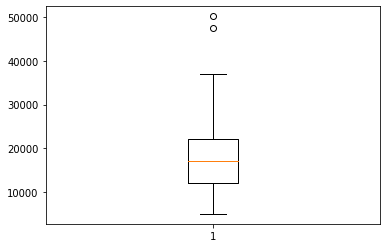

In [78]:
plt.boxplot(costs)
plt.show()
plt.close()

## Making a Boxplot for All States

We’ve made a boxplot for one state. But how does that state compare to the others? Let’s make a boxplot for every state.

To begin, we first need to create a list of all the states in our dataset and save to the variable `states`.

In [79]:
states = ischemia['Provider State'].unique()
states

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'PA', 'AK', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI'], dtype=object)

We’ll now separate the main dataset into a list of average costs grouped by state. Once again we need only values.

In [80]:
datasets = []
for state in states:
  datasets.append(ischemia[ischemia['Provider State'] == state][' Average Covered Charges '].values)
datasets[:2]

[array([ 5062.59, 22034.35, 23957.7 , 26806.52, 12191.95,  9692.54,
         8942.76, 47517.38,  8277.  , 31843.14, 20688.83, 14260.  ,
        17091.66,  9614.28, 18208.  , 20022.66, 22626.67, 11959.91,
        17312.93, 15894.84,  7370.96, 26658.31,  6357.5 , 14936.14,
        12116.75, 19739.66, 23076.94, 18391.71, 12411.15, 22162.81,
         6105.17, 20436.68, 13605.33, 17991.55,  5543.5 ,  7195.08,
        15524.21, 29608.67, 36930.39, 15692.79, 17018.21, 19088.51,
        27809.16, 50127.26, 12925.61,  5787.56, 15085.33, 17244.11]),
 array([21987.52, 34225.53, 23602.38, 18275.15, 23649.81, 18121.1 ,
        19952.86, 18954.58, 22005.56, 30355.1 , 24891.75, 13842.12,
        25693.8 , 24893.61, 23885.45, 21440.61, 28194.13, 24392.38,
        24837.8 , 22143.1 , 25436.41, 21405.11, 39917.  , 17427.72,
        20405.61, 26602.32, 24603.35, 32239.42, 23728.5 , 29496.1 ])]

Variable `datasets` now contains 50 arrays — one for each state.

Let's draw 50 boxplots.

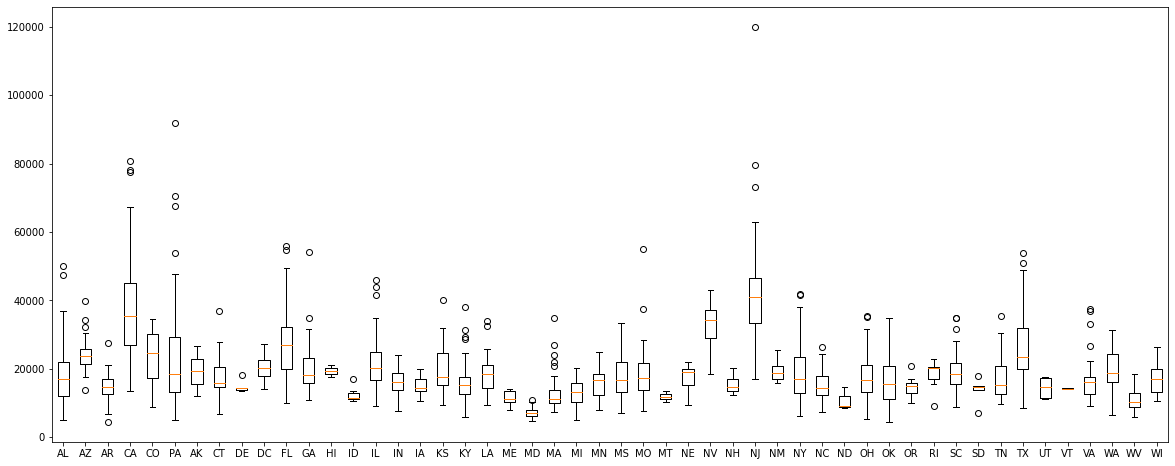

In [81]:
plt.figure(figsize=(20,8)) 

plt.boxplot(datasets, labels = states)
plt.show()


## Conclusion

- California, New Jersey, and Florida have the largest spreads of costs. 
Vermont has almost no spread.

- The state with the largest median cost for a ischemia diagnosis is New Jersey. The state with the smallest median cost is Maryland.

- California, Georgia, and Tennessee all have a fair number of outliers.